In [2]:
import pandas as pd
import gseapy as gp
import numpy as np
import matplotlib.pyplot as plt
#from pyensembl import EnsemblRelease

In [2]:
#!pyensembl install --release 108 --species homo_sapiens

In [6]:
#EnsemblRelease(108).transcript_ids_of_gene_name('MIR5692A2')

['ENST00000582551']

In [3]:
def select_gene_DE_UP(data):   
    gene_list_up =[]
    data = pd.DataFrame.dropna(data)

    for i,j in enumerate(data["symbol"]):
        if (data.iloc[i,2] > 1) & (data.iloc[i,5] < 0.05):
            gene_list_up.append(j)
        else :
            continue
    return gene_list_up

def select_gene_DE_DOWN(data):   
    gene_list_down =[]
    data = pd.DataFrame.dropna(data)

    for i,j in enumerate(data["symbol"]):
        if (data.iloc[i,2] < -1) & (data.iloc[i,5] < 0.05):
            gene_list_down.append(j)
        else :
            continue
    return gene_list_down

In [4]:
def enrichment_up(data):
    gene_up = select_gene_DE_UP(data)
    enrichment_up = gp.enrichr(gene_list=gene_up,
                 gene_sets=['KEGG_2021_Human'],
                 organism='human',
                 outdir=None,
                )
    return enrichment_up
    
def enrichment_down(data):
    gene_down = select_gene_DE_DOWN(data)
    enrichment_down = gp.enrichr(gene_list=gene_down,
                 gene_sets=['KEGG_2021_Human'],
                 organism='human',
                 outdir=None,
                )
    return enrichment_down

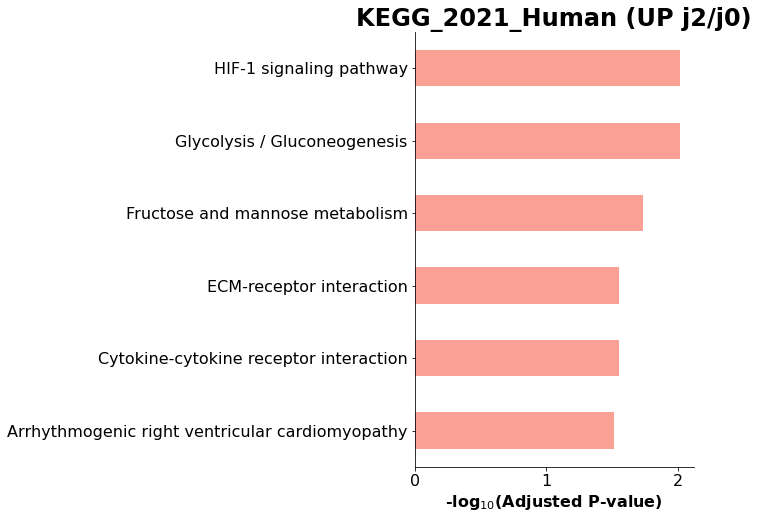

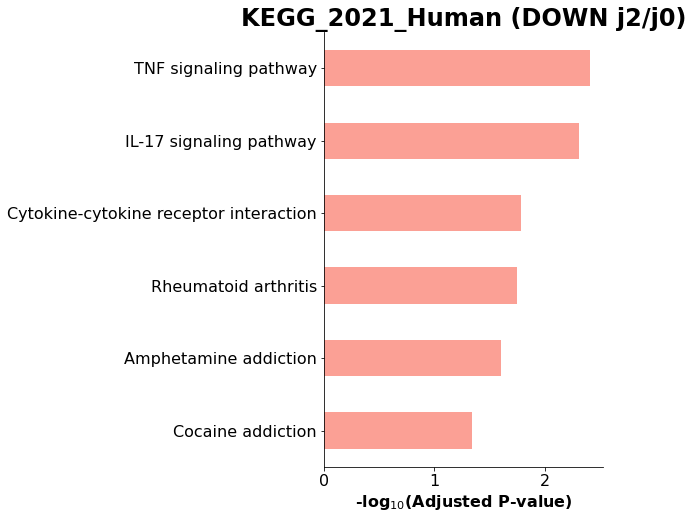

In [9]:
from gseapy import barplot, dotplot
data1 = pd.read_csv("Transcriptomic/all_de_j2_vs_j0_allgenes.txt", sep='\t')

enrichment_up1 = enrichment_up(data1)
enrichment_down1 = enrichment_down(data1)

# ax1 = dotplot(enrichment_up1.res2d, title='KEGG_2021_Human (UP j2/j0)',cmap='viridis_r', size=50, figsize=(8,11))
# ax2 = dotplot(enrichment_down1.res2d, title='KEGG_2021_Human (DOWN j2/j0)',cmap='plasma', size=50, figsize=(8,11))
ax3 = barplot(enrichment_up1.res2d,title='KEGG_2021_Human (UP j2/j0)', figsize=(5, 8))
ax4 = barplot(enrichment_down1.res2d,title='KEGG_2021_Human (DOWN j2/j0)', figsize=(5, 8))

In [6]:
enrichment_up1.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Glycolysis / Gluconeogenesis,11/67,0.000045,0.009514,0,0,4.969021,49.681165,LDHA;TPI1;PKLR;HKDC1;PGK1;ALDOC;ENO2;ALDOA;GAP...
1,KEGG_2021_Human,HIF-1 signaling pathway,14/109,0.000075,0.009514,0,0,3.735155,35.495581,ANGPT4;EGLN3;ANGPT2;SLC2A1;ENO2;HK2;LDHA;HKDC1...
2,KEGG_2021_Human,Fructose and mannose metabolism,7/33,0.000215,0.018301,0,0,6.785534,57.293366,PFKFB4;TPI1;HKDC1;ALDOC;ALDOA;HK2;PFKP
3,KEGG_2021_Human,Cytokine-cytokine receptor interaction,24/295,0.000478,0.027831,0,0,2.253845,17.234159,TNFSF18;IL1RN;IL24;BMP8A;IL19;BMP8B;IFNLR1;TNF...
4,KEGG_2021_Human,ECM-receptor interaction,11/88,0.000546,0.027831,0,0,3.609876,27.122565,FRAS1;VWF;LAMC3;LAMA1;ITGA2;ITGA10;LAMA3;SPP1;...
...,...,...,...,...,...,...,...,...,...,...
250,KEGG_2021_Human,NOD-like receptor signaling pathway,1/181,0.999196,0.999992,0,0,0.137811,0.000111,NAMPT
251,KEGG_2021_Human,RNA transport,1/186,0.999340,0.999992,0,0,0.134051,0.000089,EEF1A2
252,KEGG_2021_Human,Viral carcinogenesis,1/203,0.999662,0.999992,0,0,0.122660,0.000041,H2BC5
253,KEGG_2021_Human,Olfactory transduction,4/440,0.999966,0.999992,0,0,0.225400,0.000008,SLC8A3;GUCY2D;NCALD;SLC8A2


In [7]:
enrichment_down1.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,TNF signaling pathway,8/112,0.000026,0.003927,0,0,7.422323,78.407874,JUN;VCAM1;LIF;FOS;CXCL3;JUNB;CXCL2;CREB5
1,KEGG_2021_Human,IL-17 signaling pathway,7/94,0.000064,0.004854,0,0,7.732380,74.684659,JUN;CCL11;IL13;FOSB;FOS;CXCL3;CXCL2
2,KEGG_2021_Human,Cytokine-cytokine receptor interaction,11/295,0.000325,0.016486,0,0,3.758391,30.181850,GHR;CCL11;CXCL12;IL13;IL31RA;TNFSF10;LIF;IL12A...
3,KEGG_2021_Human,Rheumatoid arthritis,6/93,0.000468,0.017786,0,0,6.595581,50.567951,JUN;ATP6V1G2;CXCL12;FOS;CXCL3;CXCL2
4,KEGG_2021_Human,Amphetamine addiction,5/69,0.000827,0.025148,0,0,7.444143,52.834249,JUN;FOSB;FOS;GRIN2C;CREB5
...,...,...,...,...,...,...,...,...,...,...
147,KEGG_2021_Human,Regulation of actin cytoskeleton,1/218,0.903275,0.927688,0,0,0.427436,0.043482,CXCL12
148,KEGG_2021_Human,Thermogenesis,1/232,0.916822,0.935282,0,0,0.401243,0.034845,CREB5
149,KEGG_2021_Human,Parkinson disease,1/249,0.930758,0.943168,0,0,0.373414,0.026795,UBA7
150,KEGG_2021_Human,Huntington disease,1/306,0.962601,0.968976,0,0,0.302743,0.011539,CREB5


In [10]:
data2 = pd.read_csv("Transcriptomic/all_de_j4_vs_j0_allgenes.txt", sep='\t')

enrichment_up2 = enrichment_up(data2)
enrichment_down2 = enrichment_down(data2)

# ax1 = dotplot(enrichment_up2.res2d, title='KEGG_2021_Human (UP j4/j0)',cmap='viridis_r', size=50, figsize=(8,11))
# ax2 = dotplot(enrichment_down2.res2d, title='KEGG_2021_Human (DOWN j4/j0)',cmap='plasma', size=50, figsize=(8,11))

In [11]:
enrichment_up2.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Aldosterone-regulated sodium reabsorption,8/37,0.003874,0.719263,0,0,3.616035,2.008149e+01,FXYD2;SCNN1A;NEDD4L;ATP1A3;ATP1B3;PIK3R1;SGK1;...
1,KEGG_2021_Human,Complement and coagulation cascades,13/85,0.006870,0.719263,0,0,2.369632,1.180210e+01,SERPINB2;VWF;C5AR1;PLAT;F3;C3;THBD;C8G;PROC;BD...
2,KEGG_2021_Human,Breast cancer,19/147,0.008276,0.719263,0,0,1.950515,9.351591e+00,FZD1;JAG2;SHC2;SHC3;FZD4;NCOA3;WNT7B;FZD9;FZD8...
3,KEGG_2021_Human,Calcium signaling pathway,27/240,0.012241,0.719263,0,0,1.667501,7.341905e+00,CALML6;PDE1A;HTR2B;ADCY8;FGF2;CACNA1E;GRM1;MYL...
4,KEGG_2021_Human,ABC transporters,8/45,0.013078,0.719263,0,0,2.832967,1.228618e+01,ABCA1;ABCC3;ABCA6;ABCA9;ABCA7;ABCC9;ABCA12;ABCA13
...,...,...,...,...,...,...,...,...,...,...
270,KEGG_2021_Human,Ribosome,1/158,0.999988,0.999995,0,0,0.082507,9.593524e-07,MRPS6
271,KEGG_2021_Human,Prion disease,4/273,0.999993,0.999995,0,0,0.191852,1.327298e-06,C8G;CASP12;PIK3R1;COX6B2
272,KEGG_2021_Human,Herpes simplex virus 1 infection,8/498,0.999995,0.999995,0,0,0.208691,1.038348e-06,C3;ZNF540;DDX58;ZNF689;ZNF425;PIK3R1;ZNF33B;TLR2
273,KEGG_2021_Human,Olfactory transduction,2/440,0.999995,0.999995,0,0,0.058287,2.793339e-07,CALML6;PDE1A


In [12]:
enrichment_down2.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Cell cycle,22/124,3.107585e-08,0.000008,0,0,4.678127,8.087001e+01,CDKN1A;GADD45B;PLK1;BUB1B;TTK;CDC25C;PKMYT1;SM...
1,KEGG_2021_Human,Human T-cell leukemia virus 1 infection,23/219,1.411344e-04,0.019194,0,0,2.535499,2.247922e+01,EGR1;EGR2;JUN;CDKN1A;MMP7;SRF;BUB1B;FOS;HLA-F;...
2,KEGG_2021_Human,Oocyte meiosis,16/129,2.195374e-04,0.019905,0,0,3.048422,2.567987e+01,PLK1;CDC25C;PKMYT1;ADCY7;SMC1B;AURKA;CDC20;SGO...
3,KEGG_2021_Human,Oxytocin signaling pathway,16/154,1.555658e-03,0.077545,0,0,2.492885,1.611864e+01,OXTR;JUN;CDKN1A;KCNJ6;CAMK1D;KCNJ12;FOS;ADCY7;...
4,KEGG_2021_Human,Progesterone-mediated oocyte maturation,12/100,1.733868e-03,0.077545,0,0,2.926431,1.860450e+01,CCNA2;CCNB2;CCNB1;PLK1;CDK1;KIF22;CDC25C;PKMYT...
...,...,...,...,...,...,...,...,...,...,...
267,KEGG_2021_Human,Tuberculosis,2/180,9.976426e-01,0.999996,0,0,0.237309,5.600969e-04,IL6;CALM3
268,KEGG_2021_Human,Coronavirus disease,3/232,9.983935e-01,0.999996,0,0,0.276251,4.441488e-04,JUN;IL6;FOS
269,KEGG_2021_Human,Neuroactive ligand-receptor interaction,5/341,9.994823e-01,0.999996,0,0,0.312717,1.619287e-04,OXTR;EDN1;LEPR;GRIK4;APLN
270,KEGG_2021_Human,Herpes simplex virus 1 infection,8/498,9.998924e-01,0.999996,0,0,0.341426,3.672606e-05,IL6;ALYREF;SRSF3;ZNF404;ZNF610;HLA-F;SRSF7;ZNF442


In [15]:
data3 = pd.read_csv("Transcriptomic/all_de_j4_vs_j2_allgenes.txt", sep='\t')

enrichment_up3 = enrichment_up(data3)
enrichment_down3 = enrichment_down(data3)

enrichment_up3.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Protein processing in endoplasmic reticulum,18/171,2.782011e-08,0.000006,0,0,5.600058,97.427040,PDIA3;ERO1B;HSPA5;DERL3;SEL1L;SYVN1;PDIA6;PDIA...
1,KEGG_2021_Human,Aldosterone-regulated sodium reabsorption,5/37,1.064442e-03,0.106444,0,0,7.252821,49.647765,SCNN1A;PIK3R3;ATP1A3;PIK3R1;SGK1
2,KEGG_2021_Human,Leukocyte transendothelial migration,7/114,1.109847e-02,0.619194,0,0,3.039480,13.680540,CLDN4;VCAM1;CXCL12;PECAM1;PIK3R3;ESAM;PIK3R1
3,KEGG_2021_Human,Protein export,3/23,1.238388e-02,0.619194,0,0,6.934043,30.449877,SPCS3;HSPA5;SEC11C
4,KEGG_2021_Human,Carbohydrate digestion and absorption,4/47,1.760501e-02,0.681665,0,0,4.305301,17.391575,PIK3R3;ATP1A3;PIK3R1;TAS1R3
...,...,...,...,...,...,...,...,...,...,...
195,KEGG_2021_Human,Adrenergic signaling in cardiomyocytes,1/150,9.609023e-01,0.978835,0,0,0.306751,0.012234,ATP1A3
196,KEGG_2021_Human,Oxytocin signaling pathway,1/154,9.641522e-01,0.978835,0,0,0.298670,0.010903,MYLK4
197,KEGG_2021_Human,Hippo signaling pathway,1/163,9.705125e-01,0.980316,0,0,0.281946,0.008439,FZD8
198,KEGG_2021_Human,Herpes simplex virus 1 infection,5/498,9.822954e-01,0.987232,0,0,0.459666,0.008211,PDIA3;PIK3R3;PIK3R1;CALR;TLR3


In [16]:
enrichment_down3.results.sort_values("P-value")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Cell cycle,19/124,7.295732e-08,0.000018,0,0,5.046678,82.934030,PLK1;BUB1B;TTK;CDC25C;PKMYT1;CDC25A;CDC20;CCNA...
1,KEGG_2021_Human,Glycolysis / Gluconeogenesis,12/67,3.496086e-06,0.000434,0,0,6.039398,75.878193,GPI;LDHA;TPI1;ALDH1B1;PGAM1;PGK1;ALDOC;ENO1;EN...
2,KEGG_2021_Human,Oocyte meiosis,16/129,1.301790e-05,0.001076,0,0,3.930177,44.211289,PLK1;ADCY4;CDC25C;PKMYT1;AURKA;CDC20;SGO1;CCNB...
3,KEGG_2021_Human,Progesterone-mediated oocyte maturation,13/100,5.058824e-05,0.003136,0,0,4.135248,40.905010,PLK1;ADCY4;KIF22;CDC25C;PKMYT1;CDC25A;AURKA;CC...
4,KEGG_2021_Human,Fanconi anemia pathway,9/54,1.047393e-04,0.005195,0,0,5.515186,50.541367,RMI2;BLM;BRIP1;RAD51;EME1;FANCD2;UBE2T;FANCA;B...
...,...,...,...,...,...,...,...,...,...,...
243,KEGG_2021_Human,Lipid and atherosclerosis,1/215,9.995791e-01,0.999979,0,0,0.126281,0.000053,CALM3
244,KEGG_2021_Human,Coronavirus disease,1/232,9.997719e-01,0.999979,0,0,0.116883,0.000027,MASP1
245,KEGG_2021_Human,Pathways of neurodegeneration,5/475,9.998358e-01,0.999979,0,0,0.285249,0.000047,TUBA1C;TUBA1B;KLC3;CALM3;DKK2
246,KEGG_2021_Human,Olfactory transduction,3/440,9.999792e-01,0.999979,0,0,0.183872,0.000004,CALM3;NCALD;SLC8A2
